#Initiat stride
##return Gaussian distribution

#The core reinforcement learning function

We set algorithm into class, that combines random and greedy strategies altogether, with the output in a graph

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt

class MultiBandit:
    def __init__(self,k=8):#k stand for numebr of arms
       self.k=k
       self.epsilon = 0.2
       self.arms=[-0.8, -0.6, -0.4, -0.2, 0.2, 0.4, 0.6, 0.8]
       self.reward_collected=[[0],[0],[0],[0],[0],[0],[0],[0]]
       self.reward_collected_greedy=[[0],[0],[0],[0],[0],[0],[0],[0]]
       self.reward_collected_egreedy=[[0],[0],[0],[0],[0],[0],[0],[0]]
       #record estimated valuse for each arm
       self.estimated_values=np.zeros(k)
       #record numbers of pulls or plays for each arm
       self.num_pulls=np.zeros(k)
       self.timestep_collected_greedy=[[0],[0],[0],[0],[0],[0],[0],[0]]
       self.timestep_collected_egreedy=[[0],[0],[0],[0],[0],[0],[0],[0]]

    def reward_dist(a):
        arms_true_value = [-0.8, -0.6, -0.4, -0.2, 0.2, 0.4, 0.6, 0.8] # arm 0~7
        arms_std_devs = [1.5, 1.7, 1.0, 1.1, 1.6, 1.4, 1.3, 1.2]
        return np.random.normal(arms_true_value[a], arms_std_devs[a])
    
    # strategy - random
    def choose_arm(num_arms):
        return np.random.randint(num_arms)
    # strategy - greedy
    def choose_arm_greedy(estimated_values):
        return np.argmax(estimated_values)

    def choose_arm_egreedy(self, estimated_values):
      if np.random.random() > self.epsilon: 
        return np.argmax(estimated_values) # exploitation
      else:
        return np.random.randint(self.k) # exploration

    def random_strategy(self,total_times):
        print("{:=^50s}".format("Random"))
        for i in range(total_times):
           arm=self.choose_arm(8)
           #match returns reward
           r= self.reward_dist(arm)
           print("Play_time_step",i+1, ": choose arm", arm, ", receive_reward", r, ", (Hidden_arm_value", self.arms[arm],")")
           self.reward_collected[arm].append(r)
        #sum of rewards for arms
        for j in range(0,self.k):
           print("arm", j, np.sum(self.reward_collected[j]))
    
    def greedy_strategy(self,total_times):
        print("{:=^50s}".format("Greedy"))
        #print initial estimated valus of arm
        self.estimated_values=np.zeros(self.k)
        for a in range(self.k):
            print("Init estimated values for arm", a,"：", self.estimated_values[a])
        #print intial pulls of arms
        self.num_pulls=np.zeros(self.k)
        for b in range(self.k):
            print("Init number of pulls for arm", b,"：", self.num_pulls[b]) 
        #game start
        for i in range(total_times):
            arm=self.choose_arm_greedy(self.estimated_values)
            #get reword from reword funciton
            r=self.reward_dist(arm)
            self.num_pulls[arm] += 1
            #pre estimated value is value form last round
            pre_estimated_value=self.estimated_values[arm]
            #canculate the difference
            diff = r - pre_estimated_value
            self.estimated_values[arm] = self.estimated_values[arm] + diff/self.num_pulls[arm]
            print("Play_time_step",i+1, ": choose arm", arm, ", receive_reward", r, ", (Hidden_true_value", self.arms[arm],")")
            print("Previous estimated value", pre_estimated_value, "received_reward", r, "difference between the recieved reward and the previous (old) estimated_values", diff, "-> Updated estimated_values", self.estimated_values[arm])
            #collect all datas
            self.reward_collected_greedy[arm].append(r)
            self.timestep_collected_greedy[arm].append(i+1)
            #time.sleep(2)
        for j in range(self.k):
            print("arm ",j, self.reward_collected_greedy[j], np.sum(self.reward_collected_greedy[j]))
        print("Total", np.sum(np.sum(self.reward_collected_greedy)))

    def egreedy_strategy(self,total_times):
      print("{:=^50s}".format("E_Greedy"))
       #print initial estimated valus of arm
      self.estimated_values=np.zeros(self.k)
      for a in range(self.k):
          print("Init estimated values for arm", a,"：", self.estimated_values[a])
      #print intial pulls of arms
      self.num_pulls=np.zeros(self.k)
      for b in range(self.k):
          print("Init number of pulls for arm", b,"：", self.num_pulls[b])
      #game start
      for i in range(total_times):
          arm=self.choose_arm_egreedy(self, self.estimated_values)
          #get reword from reword funciton
          r=self.reward_dist(arm)
          self.num_pulls[arm] += 1
          #pre estimated value is value form last round
          pre_estimated_value=self.estimated_values[arm]
          #canculate the difference
          diff = r - pre_estimated_value
          self.estimated_values[arm] = self.estimated_values[arm] + diff/self.num_pulls[arm]
          print("Play_time_step",i+1, ": choose arm", arm, ", receive_reward", r, ", (Hidden_true_value", self.arms[arm],")")
          print(" --Previous estimated value", pre_estimated_value, "received_reward", r, "difference between the recieved reward and the previous (old) estimated_values", diff, "-> Updated estimated_values", self.estimated_values[arm])
           #collect all datas
          self.reward_collected_egreedy[arm].append(r)
          self.timestep_collected_egreedy[arm].append(i+1)
          #time.sleep(2)
      for j in range(self.k):
          print("arm ",j, self.reward_collected_egreedy[j], np.sum(self.reward_collected_egreedy[j]))
      print("Total", np.sum(np.sum(self.reward_collected_egreedy)))
    
    # def Show(self):
    #   fig, axs = plt.subplots(nrows=1, ncols=self.k, figsize=(30, 5))
    #   no_arm = 0
    #   for ax in axs.flat:
    #     ys = self.reward_collected_greedy[no_arm]
    #     x = self.timestep_collected[no_arm]
    #     ax.plot(x, ys, '-')
    #     ax.set_xticks(x) 
    #     ax.set_xticklabels(x, fontsize=12)
    #     ax.set_title("Arm", no_arm)
    #     no_arm += 1

    def Ploting(self, x, ys):
      fig = plt.figure(figsize=(30,5))

      ax1 = plt.subplot2grid((1, 8), (0, 0), rowspan=1, colspan=1)
      ax2 = plt.subplot2grid((1, 8), (0, 1), rowspan=1, colspan=1)
      ax3 = plt.subplot2grid((1, 8), (0, 2), rowspan=1, colspan=1)
      ax4 = plt.subplot2grid((1, 8), (0, 3), rowspan=1, colspan=1)
      ax5 = plt.subplot2grid((1, 8), (0, 4), rowspan=1, colspan=1)
      ax6 = plt.subplot2grid((1, 8), (0, 5), rowspan=1, colspan=1)
      ax7 = plt.subplot2grid((1, 8), (0, 6), rowspan=1, colspan=1)
      ax8 = plt.subplot2grid((1, 8), (0, 7), rowspan=1, colspan=1)

      # axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
      # no_arm = 0
      # for ax in axs:
      #   ys = self.reward_collected_greedy[no_arm]
      #   x = self.timestep_collected[no_arm]
      #   ax.plot(x, ys, '-')
      #   ax.set_xticks(x) 
      #   ax.set_xticklabels(x, fontsize=12)
      #   ax.set_title("Arm", no_arm)
      #   no_arm += 1

      ax1.plot(x[0], ys[0], '-')
      ax1.set_xticks(x[0]) 
      ax1.set_xticklabels(x[0], fontsize=12)
      ax1.set_title("Arm 0")

      ax2.plot(x[1], ys[1], '-')
      ax2.set_xticks(x[1]) 
      ax2.set_xticklabels(x[1], fontsize=12)
      ax2.set_title("Arm 1")

      ax3.plot(x[2], ys[2], '-')
      ax3.set_xticks(x[2]) 
      ax3.set_xticklabels(x[2], fontsize=12)
      ax3.set_title("Arm 2")

      ax4.plot(x[3], ys[3], '-')
      ax4.set_xticks(x[3]) 
      ax4.set_xticklabels(x[3], fontsize=12)
      ax4.set_title("Arm 3")

      ax5.plot(x[4], ys[4], '-')
      ax5.set_xticks(x[4]) 
      ax5.set_xticklabels(x[4], fontsize=12)
      ax5.set_title("Arm 4")

      ax6.plot(x[5], ys[5], '-')
      ax6.set_xticks(x[5]) 
      ax6.set_xticklabels(x[5], fontsize=12)
      ax6.set_title("Arm 5")

      ax7.plot(x[6], ys[6], '-')
      ax7.set_xticks(x[6]) 
      ax7.set_xticklabels(x[6], fontsize=12)
      ax7.set_title("Arm 6")

      ax8.plot(x[7], ys[7], '-')
      ax8.set_xticks(x[7]) 
      ax8.set_xticklabels(x[7], fontsize=12)
      ax8.set_title("Arm 7")
      
      plt.tight_layout()
      plt.show()


##For Random and Greedy strategy

======================Random======================
Play_time_step 1 : choose arm 7 , receive_reward 0.8530856180655114 , (Hidden_arm_value 0.8 )
Play_time_step 2 : choose arm 2 , receive_reward 1.1502442120153464 , (Hidden_arm_value -0.4 )
Play_time_step 3 : choose arm 1 , receive_reward -1.260128071849852 , (Hidden_arm_value -0.6 )
Play_time_step 4 : choose arm 3 , receive_reward -0.6642401268516485 , (Hidden_arm_value -0.2 )
Play_time_step 5 : choose arm 2 , receive_reward 0.8232982070259903 , (Hidden_arm_value -0.4 )
Play_time_step 6 : choose arm 2 , receive_reward -1.6140951313402718 , (Hidden_arm_value -0.4 )
Play_time_step 7 : choose arm 6 , receive_reward -2.1226012551428157 , (Hidden_arm_value 0.6 )
Play_time_step 8 : choose arm 4 , receive_reward -0.37393741135505715 , (Hidden_arm_value 0.2 )
Play_time_step 9 : choose arm 6 , receive_reward -0.8119684655381477 , (Hidden_arm_value 0.6 )
Play_time_step 10 : choose arm 1 , receive_reward -1.0095981194645667 , (Hidden_arm_value -0

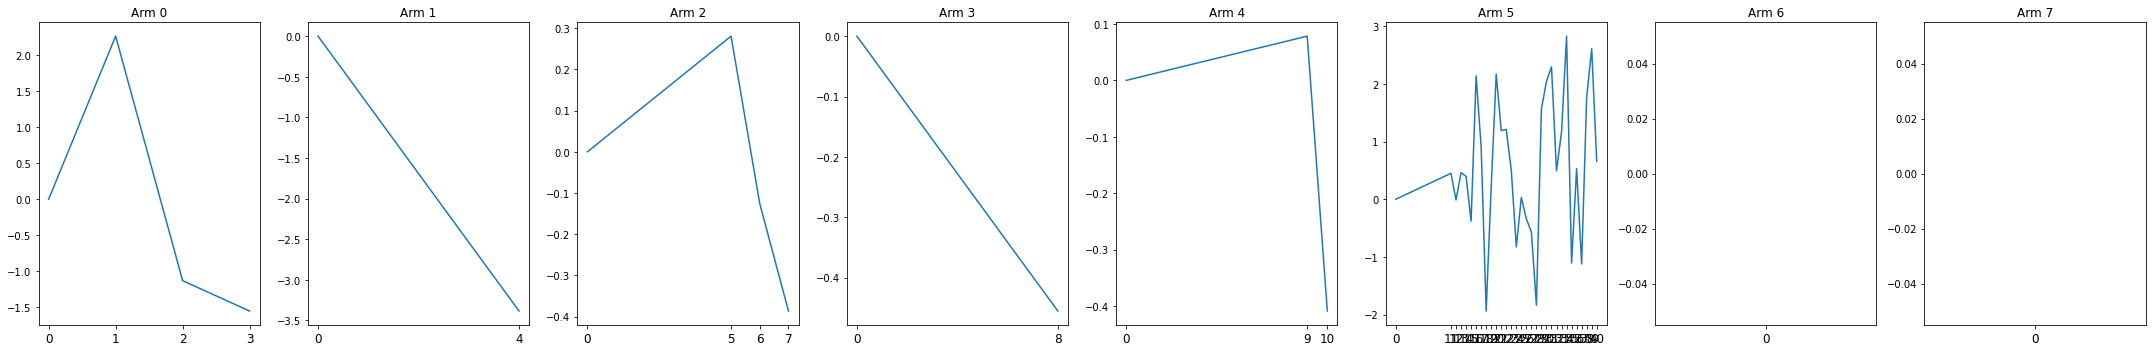

In [ ]:
operation1=MultiBandit
operation1.__init__(operation1,8)
#start as random strategy
operation1.random_strategy(operation1,40)
#start as greedy strategy
operation1.greedy_strategy(operation1,40)
#ploting results
operation1.Ploting(operation1, operation1.timestep_collected_greedy, operation1.reward_collected_greedy)


##For Modified greedy strategy

=====================E_Greedy=====================
Init estimated values for arm 0 ： 0.0
Init estimated values for arm 1 ： 0.0
Init estimated values for arm 2 ： 0.0
Init estimated values for arm 3 ： 0.0
Init estimated values for arm 4 ： 0.0
Init estimated values for arm 5 ： 0.0
Init estimated values for arm 6 ： 0.0
Init estimated values for arm 7 ： 0.0
Init number of pulls for arm 0 ： 0.0
Init number of pulls for arm 1 ： 0.0
Init number of pulls for arm 2 ： 0.0
Init number of pulls for arm 3 ： 0.0
Init number of pulls for arm 4 ： 0.0
Init number of pulls for arm 5 ： 0.0
Init number of pulls for arm 6 ： 0.0
Init number of pulls for arm 7 ： 0.0
Play_time_step 1 : choose arm 2 , receive_reward -0.3513803807086501 , (Hidden_true_value -0.4 )
 --Previous estimated value 0.0 received_reward -0.3513803807086501 difference between the recieved reward and the previous (old) estimated_values -0.3513803807086501 -> Updated estimated_values -0.3513803807086501
Play_time_step 2 : choose arm 5 , rec

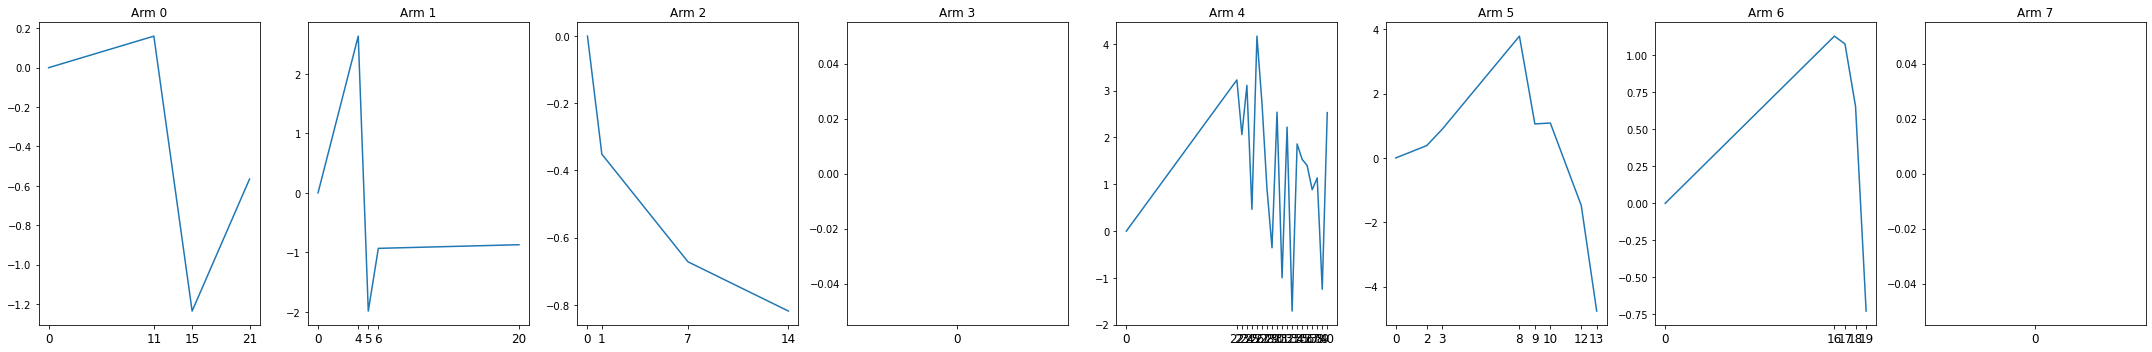

In [ ]:
#start as modified greedy strategy
operation2=MultiBandit
operation2.__init__(operation2,8)
operation2.egreedy_strategy(operation2,40)
#ploting results
operation2.Ploting(operation2, operation2.timestep_collected_egreedy, operation2.reward_collected_egreedy)